In [2]:
%matplotlib inline

import datetime as dt
import itertools as it

from IPython.core.interactiveshell import InteractiveShell
import matplotlib.pyplot as plt
import pandas as pd
import synapseclient
from synapseclient import Activity, Schema, Table, as_table_columns

InteractiveShell.ast_node_interactivity = 'all'
syn = synapseclient.Synapse()
syn.login()

Welcome, Luke Waninger!



In [ ]:
v2sid = 'syn16452948'
v2r = pd.read_csv(syn.get(v2sid).path, parse_dates=['date'])

leading = ['participant_id', 'dt_passive']

v2 = v2r.rename(columns={
    'username':'participant_id',
    'date':'dt_passive'
})
v2 = v2.reindex(labels=
    leading + sorted(list(set(v2.columns)-set(leading))),
    axis=1                  
)

v2.head()

In [10]:
cheat = []
for c in v2.columns:
    cheat.append(
        (c, str(v2[c].dtype)\
             .replace('object', 'str')\
             .replace('float64', 'float')\
             .replace('int64', 'int')\
             .replace('datetime64[ns]', 'DateTime')
        )
    )
pd.DataFrame(cheat, columns=['Variable Name', 'Data Type'])

,Variable Name,Data Type
0,participant_id,str
1,dt_passive,DateTime
2,cloud_cover_IQR,float
3,cloud_cover_max,float
4,cloud_cover_mean,float
5,cloud_cover_min,float
6,cloud_cover_q25,float
7,cloud_cover_q50,float
8,cloud_cover_q75,float
9,cloud_cover_std,float


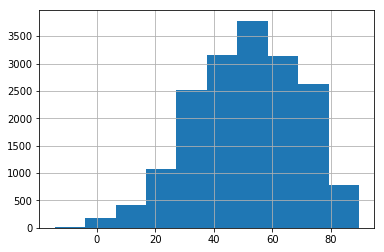

In [14]:
v2.temp_mean.hist()

In [11]:
final = syn.store(Table(
    Schema(
            name='Weather Features',
            columns=as_table_columns(v2), 
            parent='syn10848316'),
        v2
    )
)

In [12]:
final = syn.setProvenance(
    'syn17061284',
    activity=Activity(
        name='Generate Public Weather Features Table Data',
        description='Process the data collected during study ',
        used=[v2sid],
        executed=[
            dict(
                name='IPython Notebook',
                url='https://github.com/apratap/BRIGHTEN-Data-Release/blob/master/Create_WeatherFeatures_datafiles.ipynb'
            )
        ]
    )
)